# Trying `fashion-MNIST` for `4-advanced-layer-types`

In [1]:
from tensorflow import keras

In [2]:
(train_images, train_labels), (val_images, val_labels) = keras.datasets.fashion_mnist.load_data()

In [3]:
n = 5000
train_images = train_images[:n]
train_labels = train_labels[:n]

Off to a good start...

In [4]:
train_images.shape

(5000, 28, 28)

_How many features does one image in the fashion-MNIST dataset have?_

In [5]:
28 * 28

784

Smaller number of features than CIFAR-10, due to smaller dimensions of images and only one channel instead of three.

In [6]:
train_images.min(), train_images.max()

(0, 255)

In [7]:
train_labels.shape

(5000,)

In [8]:
train_labels.min(), train_labels.max()

(0, 9)

In [9]:
train_images = train_images/255.0

In [10]:
val_images.shape

(10000, 28, 28)

In [11]:
val_images = val_images / 255.0

## Convolutional Layers

### Number of parameters

Suppose we create a single Dense (fully connected) layer with 100 hidden units that connect to the input pixels, how many parameters does this layer have?

In [12]:
(28*28*100) + 100

78500

In [13]:
inputs = keras.Input(shape=(None,784))
outputs = keras.layers.Dense(100)(inputs)
model = keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, 784)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, None, 100)      │        78,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,500 (306.64 KB)

 Trainable params: 78,500 (306.64 KB)

 Non-trainable params: 0 (0.00 B)

As expected, we have fewer parameters than CIFAR-10. ~80,000 instead of ~300,000.

In [14]:
inputs = keras.Input(shape=(28,28,1)) 
x = keras.layers.Conv2D(50, (3,3), activation='relu')(inputs)
x = keras.layers.Conv2D(50, (3,3), activation='relu')(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="fashion_mnist_model_small")

model.summary()

Model: "fashion_mnist_model_small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 50)     │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │       288,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 311,060 (1.19 MB)

 Trainable params: 311,060 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

Did I implement this correctly? I added the third dimension to the shape of the `Inputs` object, as that seemed necessary to get the Conv2D function to work, but set that third dim to `1` as the images in fashion-MNIST do not have multiple channels.

## Pooling Layers

In [15]:
def create_nn():
    inputs = keras.Input(shape=(28,28,1))
    x = keras.layers.Conv2D(50, (3,3), activation='relu')(inputs)
    x = keras.layers.MaxPooling2D((2,2))(x) # a new maxpooling layer
    x = keras.layers.Conv2D(50, (3,3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2,2))(x) # a new maxpooling layer (same as maxpool)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(50, activation='relu')(x) # a new Dense layer
    outputs = keras.layers.Dense(10)(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name="fashion_MNIST_model")
    return model

model = create_nn()
model.summary()


Model: "fashion_MNIST_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 50)     │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1250)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │        62,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,110 (336.37 KB)

 Trainable params: 86,110 (336.37 KB)

 Non-trainable params: 0 (0.00 B)

## Choose a loss function and optimizer

In [16]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
compile_model(model)

## Train the model

In [17]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels))

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4902 - loss: 1.4834 - val_accuracy: 0.7413 - val_loss: 0.6728
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7868 - loss: 0.5679 - val_accuracy: 0.7913 - val_loss: 0.5648
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8389 - loss: 0.4781 - val_accuracy: 0.8254 - val_loss: 0.4906
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8353 - loss: 0.4464 - val_accuracy: 0.8073 - val_loss: 0.5213
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8407 - loss: 0.4146 - val_accuracy: 0.8311 - val_loss: 0.4779
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8713 - loss: 0.3589 - val_accuracy: 0.8468 - val_loss: 0.4367
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8822 - loss: 0.3192 - val_accuracy: 0.8503 - val_loss: 0.4260
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8898 - loss: 0.3022 - val_accu

## Measure performance

/opt/anaconda3/envs/dl_workshop/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dl_workshop/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


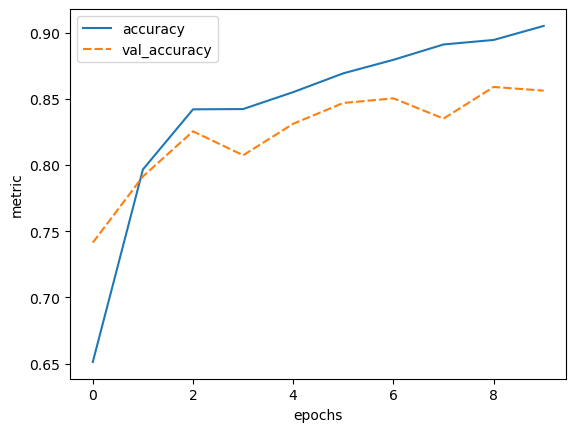

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history, metrics):
    """
    Plot the training history

    Args:
        history (keras History object that is returned by model.fit())
        metrics(str, list): Metric or a list of metrics to plot
    """
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("metric")
plot_history(history, ['accuracy', 'val_accuracy'])

/opt/anaconda3/envs/dl_workshop/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dl_workshop/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


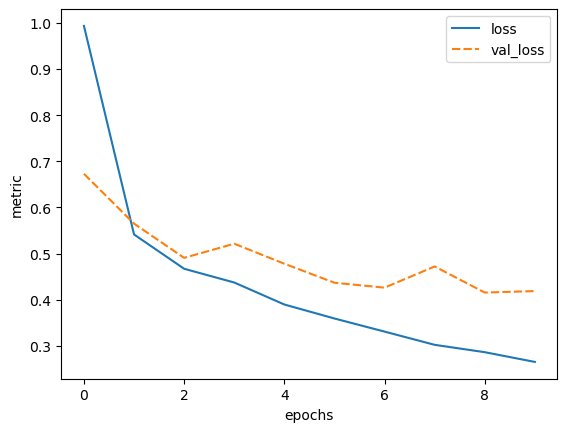

In [19]:
plot_history(history, ['loss', 'val_loss'])

These results are quite a lot better with this model than we saw with CIFAR-10, where `val_accuracy` reached ~0.5 (`val_loss` ~1.4).

## Comparison with a network with only dense layers (callout)

In [20]:
def create_dense_model():
    inputs = keras.Input(shape=(28,28,1))
    x = keras.layers.Flatten()(inputs)
    x = keras.layers.Dense(50, activation='relu')(x)
    x = keras.layers.Dense(50, activation='relu')(x)
    outputs = keras.layers.Dense(10)(x)
    return keras.models.Model(inputs=inputs, outputs=outputs,
                              name='dense_model_fashion_MNIST')

dense_model = create_dense_model()
dense_model.summary()

Model: "dense_model_fashion_MNIST"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

> As you can see this model has 1.5x more parameters than our simple CNN, let’s train and evaluate it!

This statement does not seem to hold true with the fashion-MNIST dataset. (Unless I have done something wrong, which is always a possibility..!) What should we do about it?



Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5531 - loss: 1.4071 - val_accuracy: 0.7215 - val_loss: 0.7543
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.7843 - loss: 0.6250 - val_accuracy: 0.7819 - val_loss: 0.6058
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.8244 - loss: 0.4894 - val_accuracy: 0.8056 - val_loss: 0.5508
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.8415 - loss: 0.4488 - val_accuracy: 0.8083 - val_loss: 0.5435
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.8538 - loss: 0.4217 - val_accuracy: 0.7985 - val_loss: 0.5458
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8616 - loss: 0.3908 - val_accuracy: 0.8134 - val_loss: 0.5337
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.8734 - loss: 0.3723 - val_accuracy: 0.8133 - val_loss: 0.5178
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.8900 - loss: 0.3245 - va

/opt/anaconda3/envs/dl_workshop/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dl_workshop/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


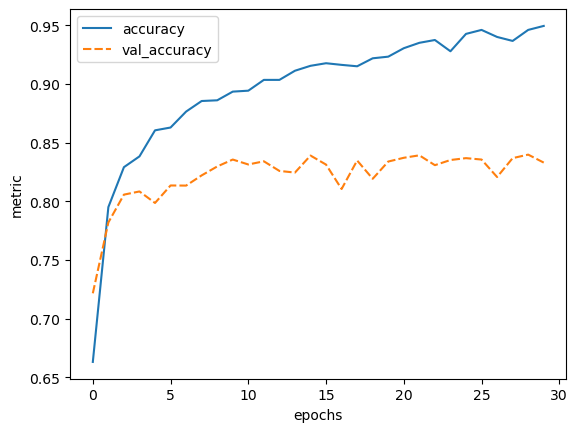

In [21]:
compile_model(dense_model)
history = dense_model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
plot_history(history, ['accuracy', 'val_accuracy'])

> As you can see the validation accuracy only reaches about 35%, whereas the CNN reached about 55% accuracy.
> 
> This demonstrates that convolutional layers are a big improvement over dense layers for this kind of datasets.

`val_accuracy` reaches 0.83 after 20 epochs here (.8355 after 10), compared with 0.8561 after 10 epochs with the CNN above. So I think the statement does not really hold with this dataset.

## Refine the model

### Challenge: Network Depth

What, do you think, will be the effect of adding a convolutional layer to your model? Will this model have more or fewer parameters? Try it out. Create a model that has an additional Conv2d layer with 50 filters after the last MaxPooling2D layer. Train it for 20 epochs and plot the results.

HINT: The model definition that we used previously needs to be adjusted as follows:

```python
inputs = keras.Input(shape=(28,28,1)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
# Add your extra layer here
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(50, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)
```

In [22]:
def create_nn_extra_layer():
    inputs = keras.Input(shape=(28,28,1))
    x = keras.layers.Conv2D(50, 3, activation='relu')(inputs)
    x = keras.layers.MaxPooling2D(2)(x)
    x = keras.layers.Conv2D(50, 3, activation='relu')(x)
    x = keras.layers.MaxPooling2D(2)(x) #
    x = keras.layers.Conv2D(50, 3, activation='relu')(x) # estra layer
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(50, activation='relu')(x) # a new Dense layer
    outputs = keras.layers.Dense(10)(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name="fashion_mnist_model_extra_Conv2D")
    return model

model = create_nn_extra_layer()

In [23]:
model.summary()

Model: "fashion_mnist_model_extra_Conv2D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 50)     │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 50)       │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 450)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,660 (268.20 KB)

 Trainable params: 68,660 (268.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4837 - loss: 1.4354 - val_accuracy: 0.7373 - val_loss: 0.7024
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7599 - loss: 0.6532 - val_accuracy: 0.7711 - val_loss: 0.6231
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7932 - loss: 0.5640 - val_accuracy: 0.7898 - val_loss: 0.5901
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8278 - loss: 0.4799 - val_accuracy: 0.8081 - val_loss: 0.5328
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8491 - loss: 0.4291 - val_accuracy: 0.8073 - val_loss: 0.5267
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8512 - loss: 0.4041 - val_accuracy: 0.8274 - val_loss: 0.4810
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8687 - loss: 0.3607 - val_accuracy: 0.8194 - val_loss: 0.4913
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8756 - loss: 0.3395 - val_accu

/opt/anaconda3/envs/dl_workshop/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dl_workshop/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


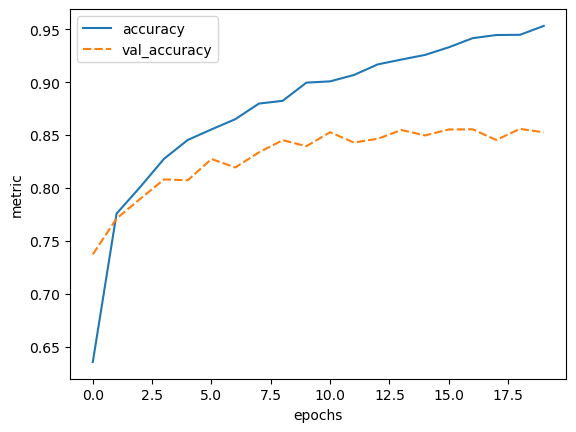

In [24]:
compile_model(model)
history = model.fit(train_images, train_labels, epochs=20,
                   validation_data=(val_images, val_labels))
plot_history(history, ['accuracy', 'val_accuracy'])

/opt/anaconda3/envs/dl_workshop/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dl_workshop/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


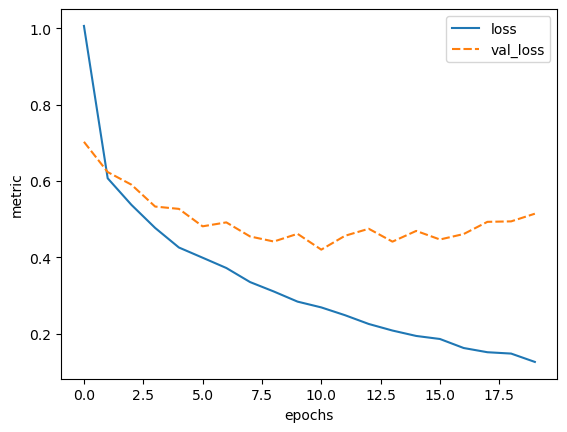

In [25]:
plot_history(history, ['loss', 'val_loss'])

> Note that the training loss continues to decrease, while the validation loss stagnates, and even starts to increase over the course of the epochs. Similarly, the accuracy for the validation set does not improve anymore after some epochs. This means we are overfitting on our training data set.

This seems to still be true.

## Dropout

In [26]:
def create_nn_with_dropout():
    inputs = keras.Input(shape=(28,28,1))
    x = keras.layers.Conv2D(50, 3, activation='relu')(inputs)
    x = keras.layers.MaxPooling2D(2)(x)
    x = keras.layers.Conv2D(50, 3, activation='relu')(x)
    x = keras.layers.MaxPooling2D(2)(x)
    x = keras.layers.Conv2D(50, 3, activation='relu')(x)
    x = keras.layers.Dropout(0.8)(x) # This is new!
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(50, activation='relu')(x)
    outputs = keras.layers.Dense(10)(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name="fashion_mnist_model_dropout")
    return model

model_dropout = create_nn_with_dropout()
model_dropout.summary()

Model: "fashion_mnist_model_dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 50)     │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 50)     │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 50)       │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 450)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │        22,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,660 (268.20 KB)

 Trainable params: 68,660 (268.20 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
compile_model(model_dropout)

history = model_dropout.fit(train_images, train_labels, epochs=20,
                    validation_data=(val_images, val_labels))

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2640 - loss: 1.9687 - val_accuracy: 0.7059 - val_loss: 0.8342
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6435 - loss: 0.9683 - val_accuracy: 0.7311 - val_loss: 0.7030
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7079 - loss: 0.7967 - val_accuracy: 0.7514 - val_loss: 0.6496
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7197 - loss: 0.7314 - val_accuracy: 0.7700 - val_loss: 0.6008
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7547 - loss: 0.6712 - val_accuracy: 0.7756 - val_loss: 0.5829
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7694 - loss: 0.6458 - val_accuracy: 0.7899 - val_loss: 0.5512
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7700 - loss: 0.6100 - val_accuracy: 0.7859 - val_loss: 0.5596
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7841 - loss: 0.5833 - val_accu

/opt/anaconda3/envs/dl_workshop/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dl_workshop/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


313/313 - 1s - 3ms/step - accuracy: 0.8426 - loss: 0.4301


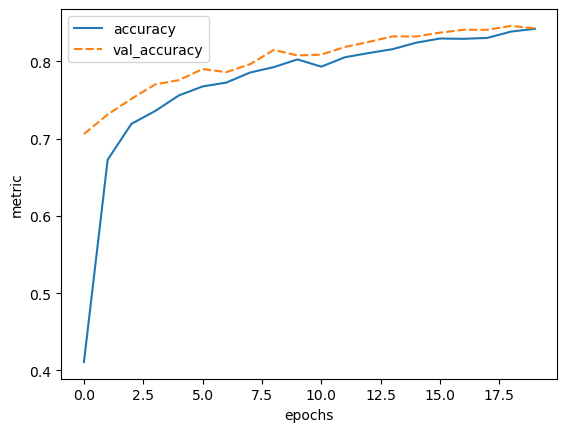

In [28]:
plot_history(history, ['accuracy', 'val_accuracy'])

val_loss, val_acc = model_dropout.evaluate(val_images,  val_labels, verbose=2)

/opt/anaconda3/envs/dl_workshop/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dl_workshop/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


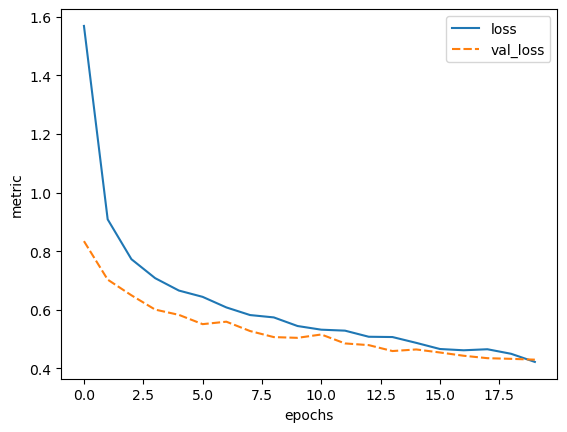

In [29]:
plot_history(history, ['loss', 'val_loss'])

> Now we see that the gap between the training accuracy and validation accuracy is much smaller,

Very true

> and that the final accuracy on the validation set is higher than without dropout.

Just about true, but really there is very little difference. After 20 epochs: 

accuracy: 0.9561 - loss: 0.1168 - val_accuracy: 0.8526 - val_loss: 0.5141
accuracy: 0.8476 - loss: 0.4103 - val_accuracy: 0.8426 - val_loss: 0.4301

| | no dropout | dropout |
|-|------------|---------|
| training accuracy | 0.9561 | 0.8476 |
| training loss | 0.1168 | 0.4103 |
| validation accuracy | 0.8526 | 0.8426 |
| validation loss | 0.5141 | 0.4301 |

> Nevertheless, there is still some difference between the training loss and validation loss, so we could experiment with regularization even more.

0.4103 - 0.4301 = -0.0198, which seems like not much difference. So I am not sure that this statement holds with the change of dataset.


### Challenge: Vary Dropout Rate

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4383 - loss: 1.5613 - val_accuracy: 0.7323 - val_loss: 0.7598
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7502 - loss: 0.6761 - val_accuracy: 0.7538 - val_loss: 0.6707
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7801 - loss: 0.6150 - val_accuracy: 0.7853 - val_loss: 0.5584
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8007 - loss: 0.5158 - val_accuracy: 0.8026 - val_loss: 0.5314
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8190 - loss: 0.4754 - val_accuracy: 0.8001 - val_loss: 0.5387
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8495 - loss: 0.4141 - val_accuracy: 0.8192 - val_loss: 0.4950
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8534 - loss: 0.3955 - val_accuracy: 0.8208 - val_loss: 0.4994
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8668 - loss: 0.3741 - val_accu

/opt/anaconda3/envs/dl_workshop/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dl_workshop/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='dropout_rate', ylabel='val_loss'>

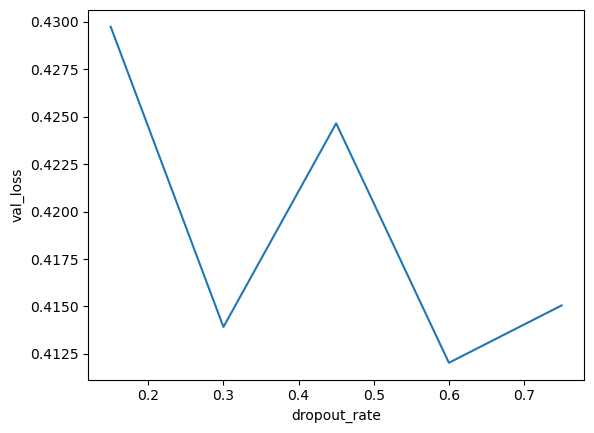

In [30]:
def create_nn_with_dropout(dropout_rate):
    inputs = keras.Input(shape=(28,28,1))
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
    x = keras.layers.Dropout(dropout_rate)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(50, activation='relu')(x)
    outputs = keras.layers.Dense(10)(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name="fashion_MNIST_varying_dropout_model")
    return model

dropout_rates = [0.15, 0.3, 0.45, 0.6, 0.75]
val_losses = []
for dropout_rate in dropout_rates:
    model_dropout = create_nn_with_dropout(dropout_rate)
    compile_model(model_dropout)
    model_dropout.fit(train_images, train_labels, epochs=20,
                    validation_data=(val_images, val_labels))

    val_loss, val_acc = model_dropout.evaluate(val_images,  val_labels)
    val_losses.append(val_loss)

loss_df = pd.DataFrame({'dropout_rate': dropout_rates, 'val_loss': val_losses})

sns.lineplot(data=loss_df, x='dropout_rate', y='val_loss')

> The code below instantiates and trains a model with varying dropout rates. You can see from the resulting plot that the ideal dropout rate in this case is around 0.45. This is where the val loss is lowest.

Seems to be around 0.6 in this case. But also, this plot is all over the place.